# COGS 108 - Final Project 

# Overview

Overview: Over the last couple of decades the burning of fossil fuels, trees, and other biological materials has caused an increase in concentration of carbon dioxide (CO2) in the atmosphere, playing a significant role for climate change. In 2017, CO2 accounted for about 81.6 percent of all U.S. greenhouse gas emissions from human activities. But, have our efforts and changes in behavior helped reduce emissions? Our project focuses on how the United States’ carbon dioxide emissions have changed over the last forty years in different industries.

Source: https://www.epa.gov/ghgemissions/overview-greenhouse-gases#carbon-dioxide

# Names & IDs

    Haoqi Wu          A13998564
    Yosuke Koike      A14692507
    Haoyin Xu         A13536088
    Pratyush Khurana  A13630236
    Chin To Chim      A14200191

# Research Question

How do carbon dioxide emissions in the United States change over time in the following categories: power industry, transport, other industrial combustion, buildings, and non-combustion areas?


## Background and Prior Work

The emission of CO2 has been a controversial issue due to  increasing sea levels and global temperature since the industrial revolution. While some articles mention that the amount of CO2 emission has increased, with the invention of technology in order to decrease the emission of CO2 and activity by countries, it would be interesting and notable to see how the change in emission of CO2 from some perspective such as by industry and by areas.

References (include links):
- 1)https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions
- 2)https://www.wri.org/blog/2018/12/new-global-co2-emissions-numbers-are-they-re-not-good

# Hypothesis


Our hypothesis is that the overall amount of CO2 emission is decreasing over time, because people are putting more efforts in environment protection and clean-energy development, resulting in inventions such as the hybrid car, smart home products, and more.


# Dataset(s)

- Dataset Name: EDGAR’s Global Fossil CO2 Emissions from 1970 to 2016  
- Link to the dataset: https://raw.githubusercontent.com/openclimatedata/edgar-co2-emissions/master/data/edgar-co2-emissions.csv 
- Number of observations: 48597(total), 235(USA)

We will be using the data from Open Climate Data -- EDGAR CO₂ emissions 1970-2016, which contains the data of the EDGAR’s Global Fossil CO2 Emissions from 1970 to 2016.  
  
The data set consists of the following fields:  
Code: the code for the country  
Name: the name of the country  
Sector: five different categories of emissions, including power industry, transport, other industrial combustion, buildings, non-combustion areas  
Year: the year of the record  
Emissions: the CO₂ emissions of this country this year in kton(Gg) unit  

Since the dataset contains data from all the countries in the world, we will select the data only from the United States (USA) and separate those data based on the Sector field. We are going to create five data sets, each containing the emissions of one of the five categories from 1970 to 2016. We will then generate appropriate graphs for each set of data and analyze the trend of CO₂ emissions over time. Moreover, we will compare the results from five categories and find out what are the similarities and differences among these trends and some possible causes. 

# Setup

In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)#enlarge figure
import seaborn as sns
sns.set(style = 'white', font_scale=2)#set scale
from scipy.stats import uniform, norm, bernoulli, poisson
from matplotlib import rc
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('edgar-co2-emissions.csv')

# Data Cleaning

Process of wrangling:
1. Read csv file into panda dataframe.
2. Removed the missing values using dropna(). Though there was no missing value.
3. Droped the 'Code' column since it is repetitive with 'Name' column.
4. Checked if there are any zero values in 'Year' column and 'Emissions' column using the command data.astype(bool).sum(axis=0) to see the number of non-zero values. I noticed there exists no zero values in 'Year' columns, though there are 48598-48156 = 442 zeros in 'Emissions' column. Thus I looked into the rows which has zero values using:

        ind = data.index[data['Emissions'] == 0].tolist()
        for x in ind:
            print(data.loc[x])
        
    There we realized the coutries which have zero emissions are developing countries such as Palau and Malta. Also, the Year is around 1970, which means it makes sense that those countries had no CO2 emissions. Hence, we concluded that the zero values are valid.
5. We extracted the dataset of USA only since we only need information of USA, which will make our project more efficiently.
6. We separated one dataset into 5 different dataset by industry so that it will be easier to analyze.

In [3]:
#data wrangling
def check_non_zero_values(data):
    print(data.astype(bool).sum(axis=0))
    print(data.count())
    ind = data.index[data['Emissions'] == 0].tolist()
    for x in ind:
        print(data.loc[x])

In [4]:
def data_wrangling(data):
    #remove rows missing values
    data = data.dropna()
    #drop code axis
    data = data.drop('Code', axis =1)
    data['Emissions']=data['Emissions']/1000
    return data

In [5]:
#separate USA data into lists of 5 elements by industry
def separate_by_industry(data):
    list = []
    list.append(data[data.Sector == 'Transport'])
    list.append(data[data.Sector == 'Other industrial combustion'])
    list.append(data[data.Sector == 'Buildings'])
    list.append(data[data.Sector == 'Non-combustion'])
    list.append(data[data.Sector == 'Power Industry'])
    return list

In [6]:
#data wrangling
#extract usa from the datasets
data = data[data.Code == 'USA']
data = data_wrangling(data)
co2ByIndustry = separate_by_industry(data)
print('Data wrangling completed')

Data wrangling completed


# Data Analysis & Results

In [7]:
#descriptive: line plot
def line_plot(ax,data,lab):
    ax.plot(data['Year'],data['Emissions'],label=lab)
    plt.legend()

In [8]:
#descriptive: central tendency and variability
def central_and_variability(data,lab):
    print('For ',lab,':')
    print('Mean:',(int)(data['Emissions'].mean()),'Tg/year')
    print('Median:',(int)(data['Emissions'].median()),'Tg/year')
    print('Range:',(int)(data['Emissions'].max()
          -data['Emissions'].min()),'Tg/year')
    up,low=np.percentile(data['Emissions'],[75,25])
    print('IQR:',(int)(up-low),'Tg/year')
    print('Standard Deviation:',(int)(data['Emissions'].std()),'Tg/year')
    print()

In [9]:
#exploratory: box plot
def box_plot(data):
    fig, axs = plt.subplots(3, 2)
    df = data.set_index('Sector')

    axs[0, 0].boxplot(df.loc['Transport', 'Emissions'], 0, 'rs', 0)
    axs[0, 0].set_title('Transport Sector')

    axs[0, 1].boxplot(df.loc['Other industrial combustion', 'Emissions'], 0, 'rs', 0)
    axs[0, 1].set_title('Other industrial combustion Sector')

    axs[1, 0].boxplot(df.loc['Buildings', 'Emissions'], 0, 'rs', 0)
    axs[1, 0].set_title('Buildings Sector')

    axs[1, 1].boxplot(df.loc['Non-combustion', 'Emissions'], 0, 'rs', 0)
    axs[1, 1].set_title('Non-combustion Sector')

    axs[2, 0].boxplot(df.loc['Power Industry', 'Emissions'], 0, 'rs', 0)
    axs[2, 0].set_title('Power Industry Sector')

    axs[2, 1].boxplot(df['Emissions'], 0, 'rs', 0)
    axs[2, 1].set_title('Total Emissions')

    plt.subplots_adjust(hspace=0.95)
    plt.show()

In [10]:
#exploratory: scatter plot and linear regression
def scatter_plot(data, sector):
    x = data['Year'].tolist()
    x = list(set(x))
    y = data.set_index('Sector')
    y = y.loc[sector]
    y = y['Emissions'].tolist()

    fig, ax=plt.subplots()
    plt.scatter(x, y, marker = 'x')
    ax.set(xlabel='Time (year)',ylabel='CO2 Emissions (Tg)',
    title='Changes of CO2 Emissions in the ' + sector + ' Industry (1970-2016)')

    x = np.array(x)
    x = x.reshape(-1, 1)
    y = np.array(y)
    y = y.reshape(-1, 1)

    linear_reg = LinearRegression()
    linear_reg.fit(x, y)
    y_pred = linear_reg.predict(x)
    plt.plot(x, y_pred, color='red')
    plt.show()

In [11]:
#exploratory: Pearson's correlation coefficient
def correlation(data, sector):
    x = data['Year'].tolist()
    x = list(set(x))
    y = data.set_index('Sector')
    y = y.loc[sector]
    y = y['Emissions'].tolist()

    coeff = np.corrcoef(x, y)
    print(sector + ": %.2f" %coeff[1, 0])

In [12]:
#adjust font size on subplots
def font_change():
    SMALL_SIZE = 18
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title

In [13]:
font_change()
#descriptive: size
print('Descriptive Data Analysis:')
print('The size of data:', data.shape)

Descriptive Data Analysis:
The size of data: (235, 4)


In [14]:
#descriptive: central tendency and variability
central_and_variability(co2ByIndustry[0],'Transport')
central_and_variability(co2ByIndustry[1],'Other industrial combustion')
central_and_variability(co2ByIndustry[2],'Buildings')
central_and_variability(co2ByIndustry[3],'Non-combustion')
central_and_variability(co2ByIndustry[4],'Power Industry')

For  Transport :
Mean: 1480 Tg/year
Median: 1454 Tg/year
Range: 767 Tg/year
IQR: 400 Tg/year
Standard Deviation: 226 Tg/year

For  Other industrial combustion :
Mean: 871 Tg/year
Median: 792 Tg/year
Range: 831 Tg/year
IQR: 267 Tg/year
Standard Deviation: 207 Tg/year

For  Buildings :
Mean: 672 Tg/year
Median: 634 Tg/year
Range: 343 Tg/year
IQR: 65 Tg/year
Standard Deviation: 103 Tg/year

For  Non-combustion :
Mean: 165 Tg/year
Median: 161 Tg/year
Range: 76 Tg/year
IQR: 19 Tg/year
Standard Deviation: 14 Tg/year

For  Power Industry :
Mean: 1930 Tg/year
Median: 2067 Tg/year
Range: 1442 Tg/year
IQR: 812 Tg/year
Standard Deviation: 435 Tg/year



Our project concerns with the emission of CO2 because it is controversial since the industrial revolution. While different industries and areas are producing more and more CO2 emissions by maximizing their productivity, people are becoming more concerned about the environmental effects and damages these chemicals would cause. With technology advances on a daily basis, alternative ways are proposed and implemented in order to reduce CO2 emissions. Hence, we believe the emission of CO2 should change in a declining trend over time as people care more about the environment along with the advancing of technology. To begin with, we import data from Open Climate Data -- EDGAR CO₂ Emissions 1970-2016, containing  EDGAR’s Global Fossil CO2 Emissions from 1970 to 2016. We focus only on the United States in order to make the analysis more efficiently.


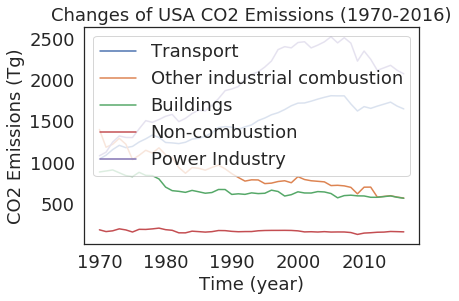

In [15]:
#descriptive: line plot
fig, ax=plt.subplots()
line_plot(ax,co2ByIndustry[0],'Transport')
line_plot(ax,co2ByIndustry[1],'Other industrial combustion')
line_plot(ax,co2ByIndustry[2],'Buildings')
line_plot(ax,co2ByIndustry[3],'Non-combustion')
line_plot(ax,co2ByIndustry[4],'Power Industry')
ax.set(xlabel='Time (year)',ylabel='CO2 Emissions (Tg)',
       title='Changes of USA CO2 Emissions (1970-2016)')
plt.show()

In [16]:
#exploratory: Pearson's correlation coefficient
print("Pearson's correlation coefficient for each sector:")
correlation(data, 'Transport')
correlation(data, 'Other industrial combustion')
correlation(data, 'Buildings')
correlation(data, 'Non-combustion')
correlation(data, 'Power Industry')

Pearson's correlation coefficient for each sector:
Transport: 0.93
Other industrial combustion: -0.94
Buildings: -0.84
Non-combustion: -0.58
Power Industry: 0.88


We first plotted the trend of CO2 Emissions in Tg over time in each industry and area we consider. We noticed that the CO2 emissions in Non-combustion fields are having a steady trend, which makes sense because of the lack of combustion. We also noticed that Buildings and Other industrial combustion areas are having a similar decreasing trend in CO2 Emissions since around 1980s. Transport and Power Industry are two areas that have an increase in CO2 Emissions, with the Power Industry mostly dominating. Transportation operates with Petroleum, which will greatly produce CO2 emission, and alternative fuel vehicles became popular around the late 2000s and in the 2010s, which explained the decline in CO2 emissions in Transport area in the similar time. Power (e.g. electricity) is generated mostly by burning carbon fuels such as coals, therefore the dominant increase in Power Industry seems reasonable. Alternative power sources such as solar energy, wind energy, and many more became more popular in recent years, which should help reduce CO2 Emissions, as shown in our plot. We are able to plot a reasonable graph showing the changes in CO2 Emissions over time, with a declining trend in recent years. We then want to look more closely and precisely to each area of their CO2 Emissions trend over time.


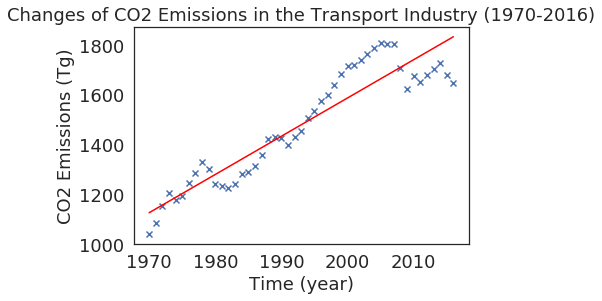

In [17]:
#exploratory: scatter plot + linear regression
scatter_plot(data, 'Transport')

As we explained previously, CO2 emissions in the Transport industry increased because of the use of fossil fuels and Petroleum. The declining trend appears in the late 2000s and 2010s, corresponding to the recent awareness of environmental problems as well as alternative energy inventions. Interestingly, the steadily increasing CO2 emissions in the Transport industry have a slight decline in about every decade.

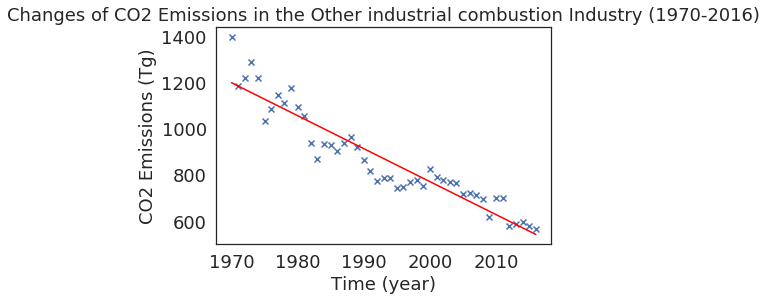

In [18]:
scatter_plot(data, 'Other industrial combustion')

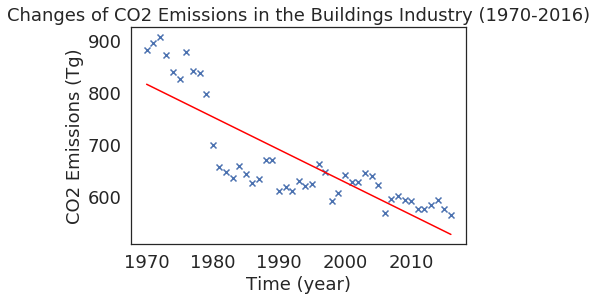

In [19]:
scatter_plot(data, 'Buildings')

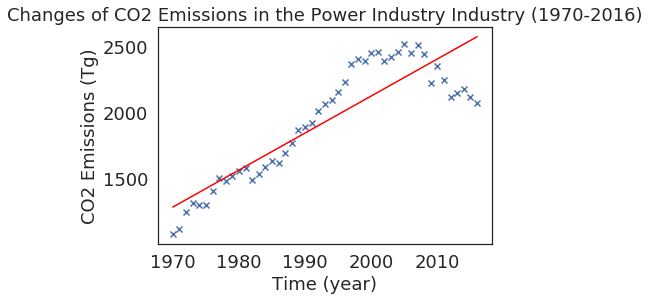

In [20]:
scatter_plot(data, 'Power Industry')

Finally, the dominant CO2 emission industry - Power industry. As expected, the power industry has a straight increasing trend in CO2 emissions because power and energy are generated through burning fuels. This plot shows clearly the significant decline trend in CO2 Emissions in the power industry beginning late 2000s, aligning with our assumption that people’s concern about the environment along with technology inventions in the act of reducing CO2 emissions.

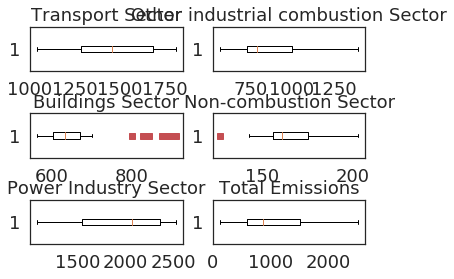

In [21]:
#exploratory: box plots
box_plot(data)

# Ethics & Privacy

The emissions of carbon dioxide have damaging effects on our environment. To understand such influences, we should have a clear understanding about the changes of such emissions. We obtained the CO2 emission data from an open repository on GitHub. These data are generalized and reveal no information concerning individuals or companies. The analyses of these data thus have minimal effects on the people who collected them.

We understand that our analysis might have political influences. Recently politicians are more used to attract voters by talking about their views on climate change, which is directly related to our data. The open access to the information we used makes it impossible to block the information, so our goal should be making our analysis as objective as possible. We tried to eliminate our personal, especially political bias from our analysis.

# Conclusion & Discussion

Our project focuses on how the United States’ carbon dioxide emissions changed over time in different industries. We separated our data analysis into two parts: descriptive and exploratory. For descriptive analysis, we created a line plot and calculated central tendency and variability. For exploratory analysis, we created scatter plots with lines of regressions, box plots, and found the Pearson's correlation coefficient of the data.

Our hypothesis is that the amount of CO2 emissions decreased over time due to public awareness and technological advancements. From our data analysis and results for each category, we can conclude that Buildings, Non-combustion, and Other Industrial Combustion categories follow our hypothesis since the CO2 emissions of these categories have been decreasing over the 46 years. However, the transport and power industries’ data do not support our hypothesis since their emissions have increased over time. Specifically, the regression lines and correlation coefficient for Buildings (r = -0.84), Other Industrial Combustion (r = -0.94), and Non-combustion (r = -0.58) show that there is a strong negative correlation between CO2 emissions and time. Conversely, Transport (r = 0.93) and Power Industry (r = 0.88) sectors have a strong positive correlation, where the CO2 emissions have increased over time. 

Even though our results do not fully support our hypothesis, it is still meaningful to notice the changes in CO2 emissions from 1970 to 2016, especially in Transport and Power Industry. Our common belief that the CO2 emissions are decreasing as the technology advances may not actually be correct as our analysis has suggested, and CO2 emissions are still a significant issue that we should be aware of and take actions to resolve. The good news is, there is a general trend of decreasing CO2 emissions in industries other than transportation and power industry, and even for these two industries their emissions show an inclination to decrease after the peak around 2005. The reason behind these trends is beyond our analysis but would be something meaningful for further research and discussions.